In [240]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing,Standardizing
from sklearn.preprocessing import StandardScaler

#For Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Models
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#Metrics
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [241]:
df=pd.read_csv(r'C:\Users\delkl\Desktop\DataTrained Data Science Projects\Projects\avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [242]:
df.shape

(18249, 14)

We have 18249 rows and 14 columns

In [243]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

We have object type variable in 3 features, int type in 2 features and float in 8 features. AveragePrice is our Target variable.

In [244]:
df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

We have no null or missing values in the dataset

In [267]:
#Dropping duplicate values if any
df.drop_duplicates(inplace=True)
df.shape

(14702, 10)

In [245]:
df.drop(columns=['Unnamed: 0','Total Bags','Small Bags','Large Bags','XLarge Bags'],axis=1,inplace=True)

We are dropping these features because it is of no use to us

In [246]:
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month

Converting date feature to numerical data so our machine can understand it

In [247]:
df.drop(['Date'],axis=1,inplace=True)

Dropping the original date feature since we have already created new 

In [248]:
from sklearn.preprocessing import LabelEncoder

lab_enc=LabelEncoder()

df1=lab_enc.fit_transform(df['type'])
df2=lab_enc.fit_transform(df['region'])

df['type']=df1
df['region']=df2

We have converted 2 of the object datatypes to numerical data

In [268]:
df.describe()

,AveragePrice,TotalVolume,PLUA,PLUB,PLUC,type,year,region,Day,Month
count,14702.000000,14702.000000,14702.000000,14702.000000,14702.000000,14702.000000,14702.000000,14702.000000,14702.000000,14702.000000
mean,1.479268,4.584861,3.573564,3.930800,11192.169261,0.615631,2016.146851,26.228540,15.749694,6.226704
std,0.392356,0.789218,1.221476,1.055649,11064.383336,0.486462,0.933980,15.316021,8.761155,3.539311
min,0.440000,1.927165,0.000000,0.100371,0.830000,0.000000,2015.000000,0.000000,1.000000,1.000000
25%,1.180000,3.915430,2.766686,3.307016,203.610000,0.000000,2015.000000,13.000000,8.000000,3.000000
50%,1.450000,4.643591,3.578530,4.072007,6520.185000,1.000000,2016.000000,26.000000,16.000000,6.000000
75%,1.730000,5.295584,4.659946,4.759879,22839.735993,1.000000,2017.000000,39.000000,24.000000,9.000000
max,3.250000,6.025624,5.480909,5.580925,55327.240000,1.000000,2018.000000,53.000000,31.000000,12.000000


### Observation:
1. No null values
2. Outliers present in Total Volume, 4046, 4225 and 4770

In [250]:
df.rename(columns={'Total Volume':'TotalVolume','4046':'PLUA','4225':'PLUB','4770':'PLUC'},inplace=True)

Renaming the columns for better understanding

In [269]:
df

,AveragePrice,TotalVolume,PLUA,PLUB,PLUC,type,year,region,Day,Month
0,1.33,4.807783,3.015670,4.736037,48.160000,0,2015,0,27,12
1,1.35,4.739390,2.828840,4.649713,58.330000,0,2015,0,20,12
2,0.93,5.072692,2.900203,5.038022,130.500000,0,2015,0,13,12
3,1.08,4.897584,3.053846,4.857190,72.580000,0,2015,0,6,12
4,1.28,4.707907,2.973811,4.641855,75.780000,0,2015,0,29,11
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,4.232356,3.311109,3.184464,22839.735993,1,2018,53,4,2
18245,1.71,4.142641,3.076167,3.535484,22839.735993,1,2018,53,28,1
18246,1.87,4.138832,3.076247,3.389660,727.940000,1,2018,53,21,1
18247,1.93,4.209655,3.184018,3.474368,727.010000,1,2018,53,14,1


## Multivariate Analysis

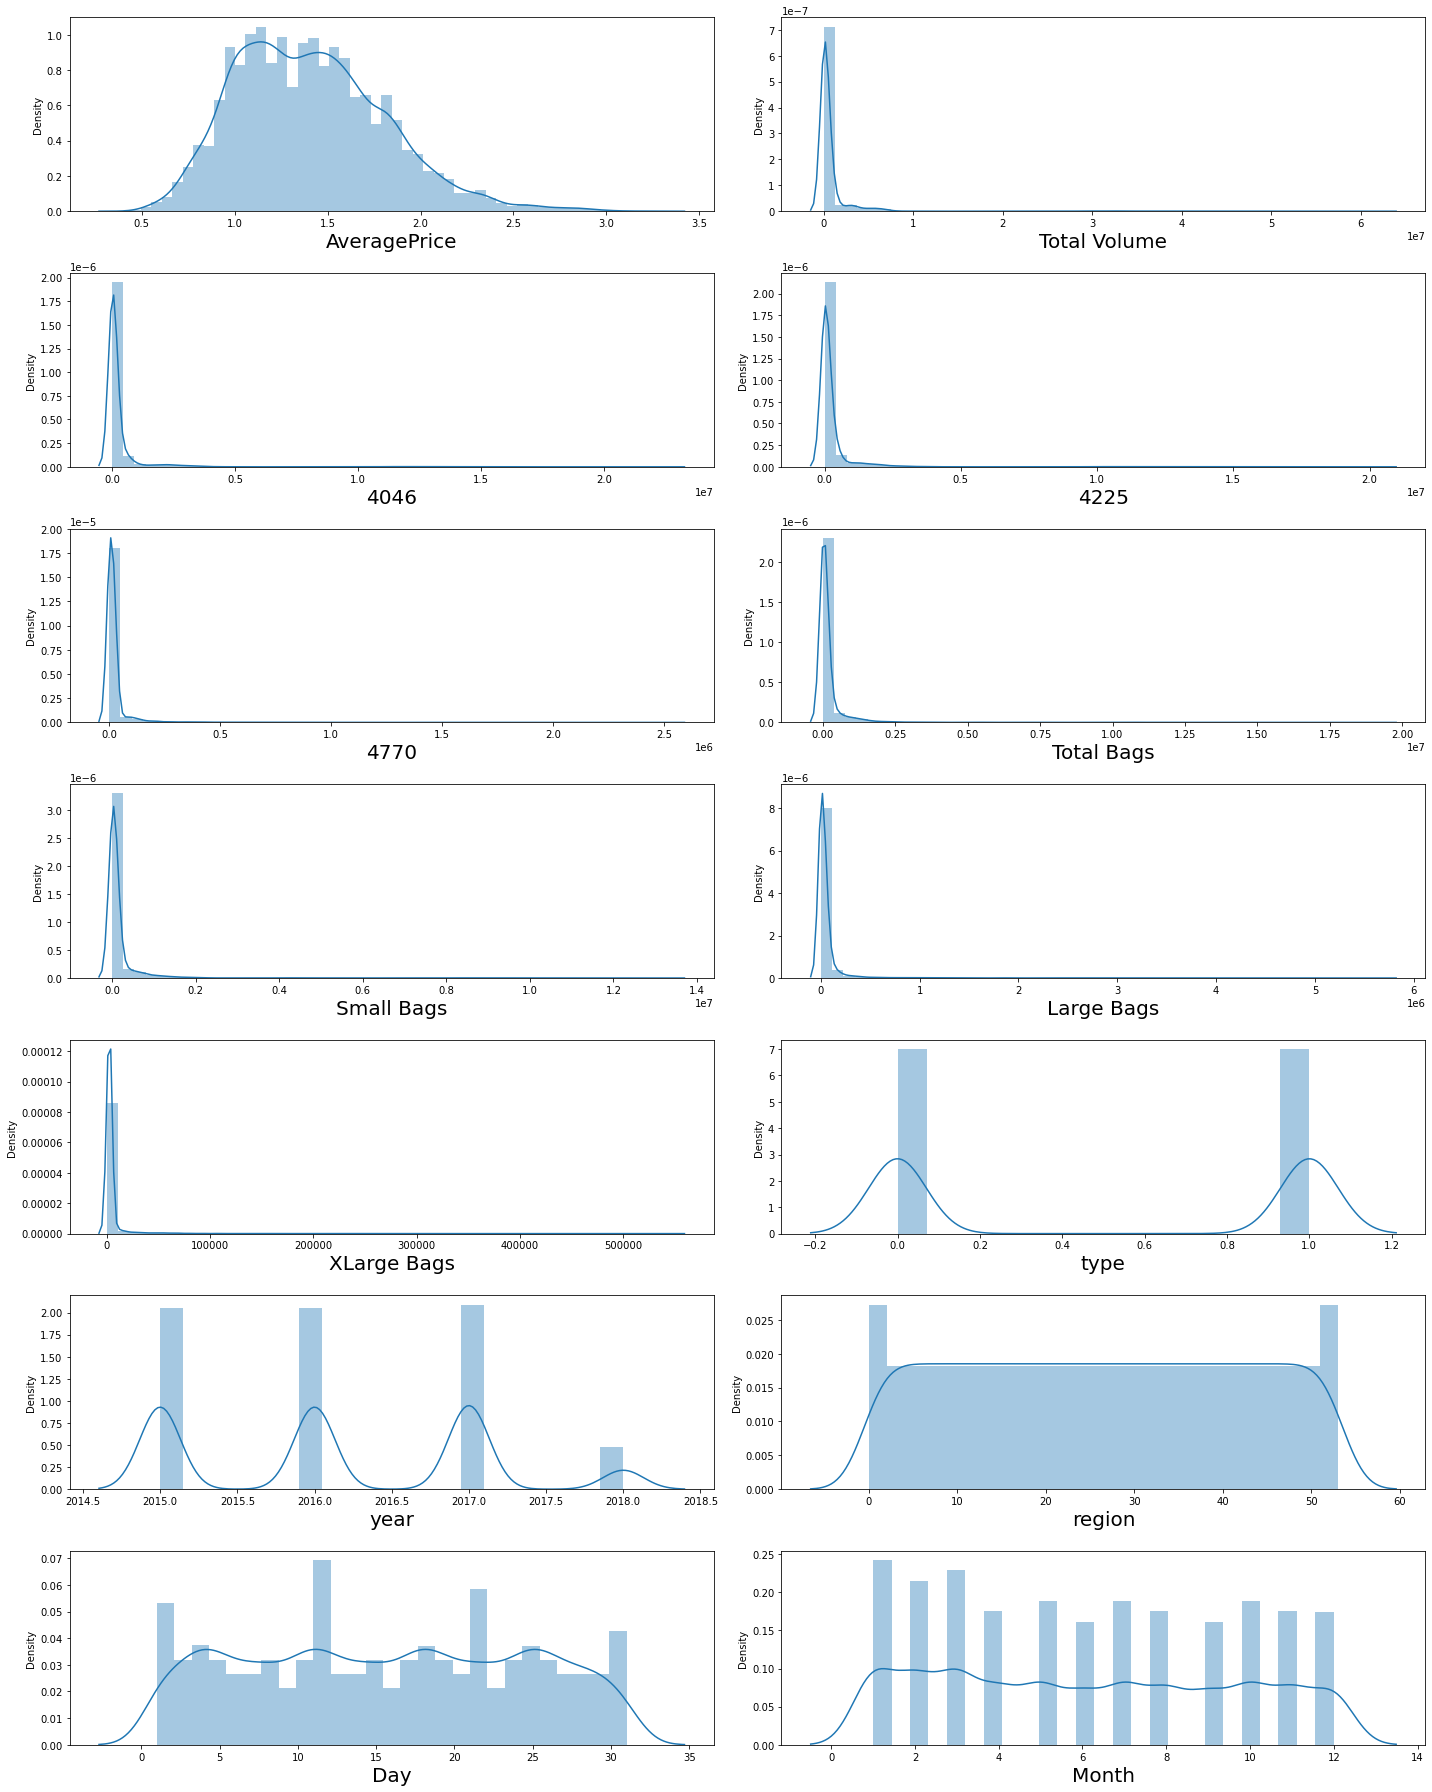

In [57]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=14:
        ax=plt.subplot(7,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.tight_layout()

TotalVolume, PLUA, PLUB and PLUC are rightly skewed. Rest are normally distributed.

In [251]:
df['PLUA']=df['PLUA'].replace(0.0,df['PLUA'].mean())
df['PLUB']=df['PLUB'].replace(0.0,df['PLUB'].mean())
df['PLUC']=df['PLUC'].replace(0.0,df['PLUC'].mean())

Replacing the zeroes in the dataset with their respective mean

### Outlier detection

In [252]:
df_features=df[['TotalVolume','PLUA','PLUB','PLUC','Day']]

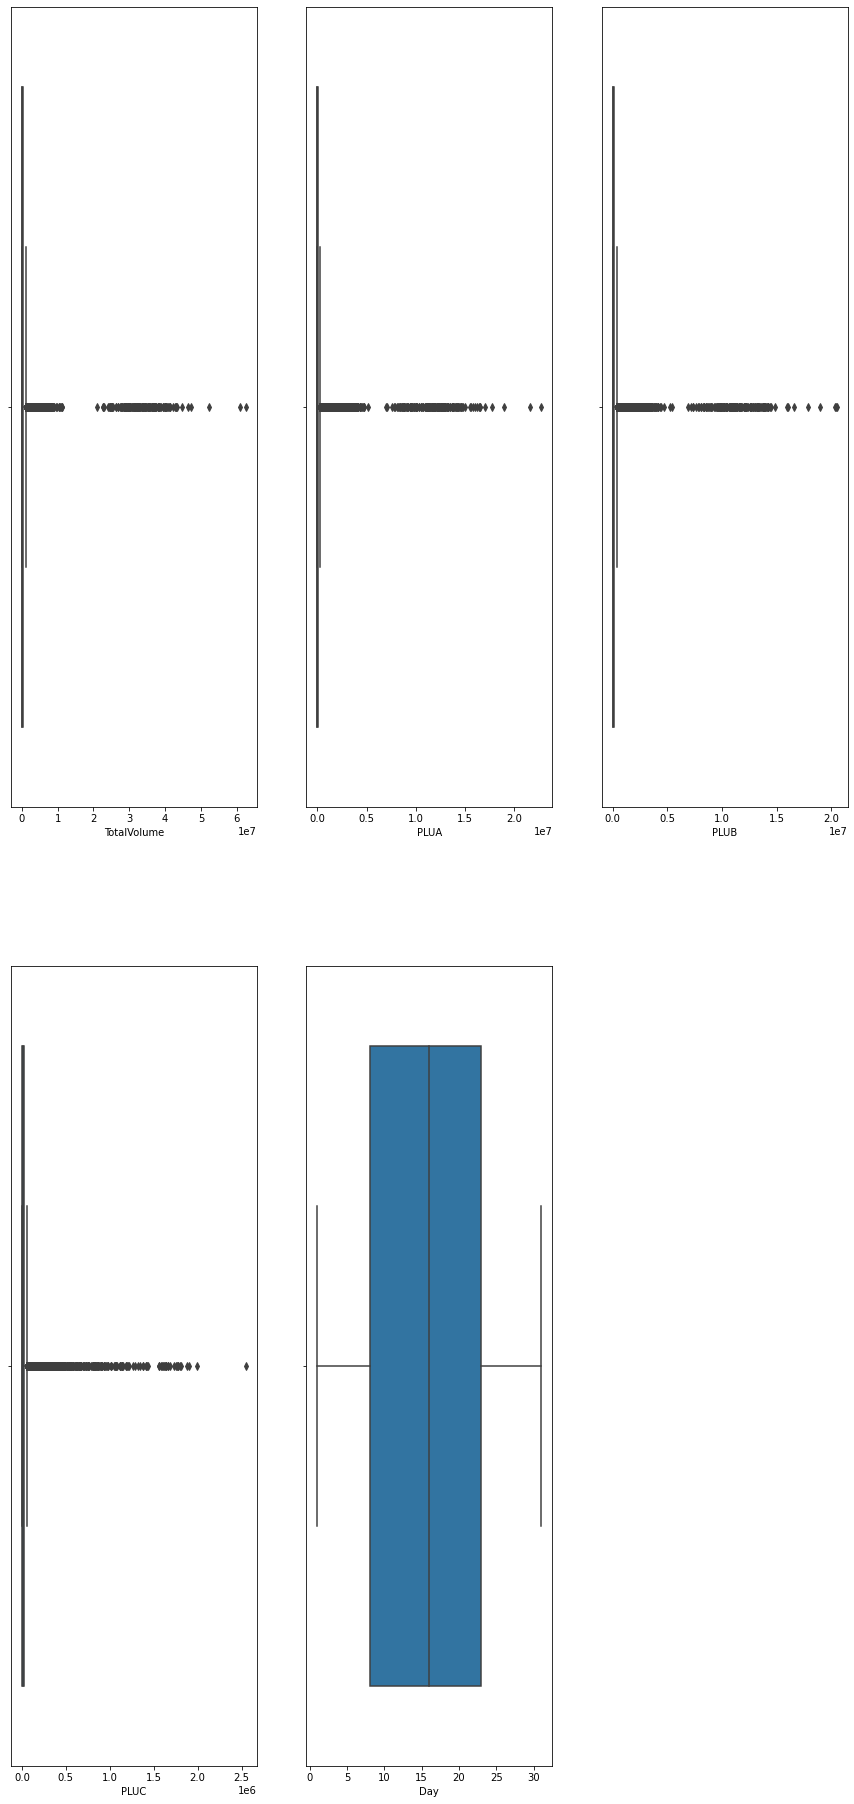

In [253]:
plt.figure(figsize=(15,50))
graph=1

for column in df_features:
    if(graph<=9):
        ax=plt.subplot(3,3,graph)
        sns.boxplot(df_features[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

Outliers present in TotalVolume, PLUA, PLUB and PLUC

In [254]:
df.skew()

AveragePrice     0.580303
TotalVolume      9.007687
PLUA             8.648526
PLUB             8.942760
PLUC            10.244212
type             0.000329
year             0.215339
region           0.000030
Day              0.014310
Month            0.106617
dtype: float64

Heavy skewness in TotalVolume, PLUA, PLUB and PLUC

### Removing outliers

In [255]:
#Find the IQR (inter quantile range) to identify outliers

q1=df.quantile(0.25) #1st quantile

q3=df.quantile(0.75) #3rd quantile

#IQR
iqr=q3-q1
iqr

AveragePrice         0.560000
TotalVolume     422123.710000
PLUA            120794.800000
PLUB            151171.440000
PLUC             22461.085993
type                 1.000000
year                 2.000000
region              27.000000
Day                 15.000000
Month                6.000000
dtype: float64

In [256]:
index=np.where(df['TotalVolume']>(q3.TotalVolume)+(1.5*iqr.TotalVolume))
df=df.drop(df.index[index])
print('Shape:',df.shape)
df.reset_index()

Shape: (15952, 10)


,index,AveragePrice,TotalVolume,PLUA,PLUB,PLUC,type,year,region,Day,Month
0,0,1.33,64236.62,1036.74,54454.85,48.160000,0,2015,0,27,12
1,1,1.35,54876.98,674.28,44638.81,58.330000,0,2015,0,20,12
2,2,0.93,118220.22,794.70,109149.67,130.500000,0,2015,0,13,12
3,3,1.08,78992.15,1132.00,71976.41,72.580000,0,2015,0,6,12
4,4,1.28,51039.60,941.48,43838.39,75.780000,0,2015,0,29,11
...,...,...,...,...,...,...,...,...,...,...,...
15947,18244,1.63,17074.83,2046.96,1529.20,22839.735993,1,2018,53,4,2
15948,18245,1.71,13888.04,1191.70,3431.50,22839.735993,1,2018,53,28,1
15949,18246,1.87,13766.76,1191.92,2452.79,727.940000,1,2018,53,21,1
15950,18247,1.93,16205.22,1527.63,2981.04,727.010000,1,2018,53,14,1


In [257]:
index=np.where(df['PLUA']>(q3.PLUA)+(1.5*iqr.PLUA))
df=df.drop(df.index[index])
print('Shape:',df.shape)
df.reset_index()

Shape: (15426, 10)


,index,AveragePrice,TotalVolume,PLUA,PLUB,PLUC,type,year,region,Day,Month
0,0,1.33,64236.62,1036.74,54454.85,48.160000,0,2015,0,27,12
1,1,1.35,54876.98,674.28,44638.81,58.330000,0,2015,0,20,12
2,2,0.93,118220.22,794.70,109149.67,130.500000,0,2015,0,13,12
3,3,1.08,78992.15,1132.00,71976.41,72.580000,0,2015,0,6,12
4,4,1.28,51039.60,941.48,43838.39,75.780000,0,2015,0,29,11
...,...,...,...,...,...,...,...,...,...,...,...
15421,18244,1.63,17074.83,2046.96,1529.20,22839.735993,1,2018,53,4,2
15422,18245,1.71,13888.04,1191.70,3431.50,22839.735993,1,2018,53,28,1
15423,18246,1.87,13766.76,1191.92,2452.79,727.940000,1,2018,53,21,1
15424,18247,1.93,16205.22,1527.63,2981.04,727.010000,1,2018,53,14,1


In [258]:
index=np.where(df['PLUB']>(q3.PLUB)+(1.5*iqr.PLUB))
df=df.drop(df.index[index])
print('Shape:',df.shape)
df.reset_index()

Shape: (14824, 10)


,index,AveragePrice,TotalVolume,PLUA,PLUB,PLUC,type,year,region,Day,Month
0,0,1.33,64236.62,1036.74,54454.85,48.160000,0,2015,0,27,12
1,1,1.35,54876.98,674.28,44638.81,58.330000,0,2015,0,20,12
2,2,0.93,118220.22,794.70,109149.67,130.500000,0,2015,0,13,12
3,3,1.08,78992.15,1132.00,71976.41,72.580000,0,2015,0,6,12
4,4,1.28,51039.60,941.48,43838.39,75.780000,0,2015,0,29,11
...,...,...,...,...,...,...,...,...,...,...,...
14819,18244,1.63,17074.83,2046.96,1529.20,22839.735993,1,2018,53,4,2
14820,18245,1.71,13888.04,1191.70,3431.50,22839.735993,1,2018,53,28,1
14821,18246,1.87,13766.76,1191.92,2452.79,727.940000,1,2018,53,21,1
14822,18247,1.93,16205.22,1527.63,2981.04,727.010000,1,2018,53,14,1


In [259]:
index=np.where(df['PLUC']>(q3.PLUC)+(1.5*iqr.PLUC))
df=df.drop(df.index[index])
print('Shape:',df.shape)
df.reset_index()

Shape: (14702, 10)


,index,AveragePrice,TotalVolume,PLUA,PLUB,PLUC,type,year,region,Day,Month
0,0,1.33,64236.62,1036.74,54454.85,48.160000,0,2015,0,27,12
1,1,1.35,54876.98,674.28,44638.81,58.330000,0,2015,0,20,12
2,2,0.93,118220.22,794.70,109149.67,130.500000,0,2015,0,13,12
3,3,1.08,78992.15,1132.00,71976.41,72.580000,0,2015,0,6,12
4,4,1.28,51039.60,941.48,43838.39,75.780000,0,2015,0,29,11
...,...,...,...,...,...,...,...,...,...,...,...
14697,18244,1.63,17074.83,2046.96,1529.20,22839.735993,1,2018,53,4,2
14698,18245,1.71,13888.04,1191.70,3431.50,22839.735993,1,2018,53,28,1
14699,18246,1.87,13766.76,1191.92,2452.79,727.940000,1,2018,53,21,1
14700,18247,1.93,16205.22,1527.63,2981.04,727.010000,1,2018,53,14,1


In [260]:
df.skew()

AveragePrice    0.566365
TotalVolume     1.929440
PLUA            2.145301
PLUB            2.241157
PLUC            0.346048
type           -0.475458
year            0.209159
region         -0.028022
Day             0.001910
Month           0.084726
dtype: float64

Still TotalVolume, PLUA and PLUB are skewed

### Removing skewness

In [261]:
df['TotalVolume']=np.log10(df['TotalVolume'])
df['PLUA']=np.log10(df['PLUA'])
df['PLUB']=np.log10(df['PLUB'])

In [262]:
df.skew()

AveragePrice    0.566365
TotalVolume    -0.154856
PLUA           -0.392870
PLUB           -0.687614
PLUC            0.346048
type           -0.475458
year            0.209159
region         -0.028022
Day             0.001910
Month           0.084726
dtype: float64

Now it looks the data is normally distributed

### Checking Multicollinearity

In [263]:
#finding out correlation between the features
corr=df.corr()
corr.shape

(10, 10)

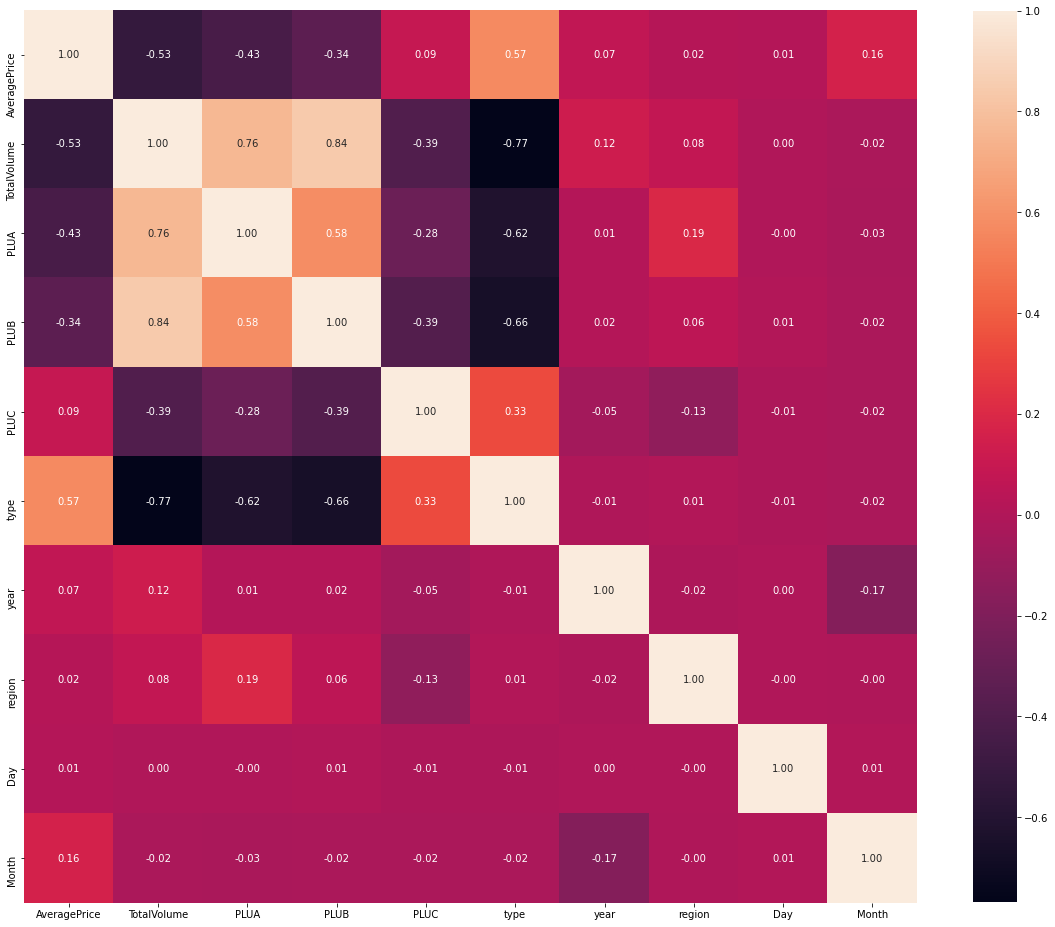

In [264]:
#plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))

sns.heatmap(corr,cbar=True,square=True,cbar_kws={'shrink':0.82},fmt='.2f',annot=True,annot_kws={'size':10})
plt.show()

looks PLUB and TotalVolume have high collinearity. Lets find out more

In [265]:
X=df.drop(columns=['AveragePrice'],axis=1)
y=df['AveragePrice']

In [266]:
scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

vif=pd.DataFrame()
vif['score']=[variance_inflation_factor(X_scaler,i) for i in range(X_scaler.shape[1])]
vif['Features']=X.columns

vif

,score,Features
0,7.272349,TotalVolume
1,2.682849,PLUA
2,3.748504,PLUB
3,1.221655,PLUC
4,2.563067,type
5,1.124500,year
6,1.084209,region
7,1.000506,Day
8,1.037214,Month


## Finding the best random state

In [205]:
maxAccu=0
maxRs=0
for i in range(1,200):
    X_train,x_test,Y_train,y_test=train_test_split(X_scaler,y,test_size=0.25,random_state=i)
    mod=LinearRegression()
    mod.fit(X_train,Y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Best accuracy is:",maxAccu,"on Random State",maxRs)

Best accuracy is: 0.5078617191822838 on Random State 101


In [206]:
X_train,x_test,Y_train,y_test=train_test_split(X_scaler,y,test_size=0.25,random_state=101)

In [207]:
lr.fit(X_train,Y_train)

LinearRegression()

In [208]:
pred=lr.predict(x_test)

In [209]:
print(r2_score(y_test,pred))

0.5078617191822838


In [214]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,Y_train)
pred=DTR.predict(x_test)
print(r2_score(y_test,pred))

0.6896164056527259


In [217]:
RFR=RandomForestRegressor()
RFR.fit(X_train,Y_train)
pred=RFR.predict(x_test)
print(r2_score(y_test,pred))

0.8732446713878048


In [220]:
knn=KNeighborsRegressor()
knn.fit(X_train,Y_train)
pred=knn.predict(x_test)
print(r2_score(y_test,pred))

0.744785900930786


In [221]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(X_train,Y_train)
pred=ada.predict(x_test)
print(r2_score(y_test,pred))

0.5749353629811016


## Regularization

In [270]:
from sklearn.linear_model import Lasso

In [211]:
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [212]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(X_train,Y_train)
ls.score(X_train,Y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.507797044419477

## Cross validation

In [271]:
from sklearn.model_selection import cross_val_score

In [223]:
print(cross_val_score(lr,X_scaler,y,cv=5).mean())

-0.033511891007676486


In [224]:
print(cross_val_score(RFR,X_scaler,y,cv=5).mean())

0.21018680299490383


In [225]:
print(cross_val_score(DTR,X_scaler,y,cv=5).mean())

-0.3400243025069594


In [226]:
print(cross_val_score(knn,X_scaler,y,cv=5).mean())

-0.04154587188350913


In [227]:
print(cross_val_score(ada,X_scaler,y,cv=5).mean())

0.005464020887276133


## Hyperparameter Testing

In [236]:
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,Y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [239]:
rf=RandomForestRegressor(max_features='auto',criterion='mse')
rf.fit(X_train,Y_train)
rf.score(X_train,Y_train)
pred=rf.predict(x_test)
rfs=r2_score(y_test,pred)
print('R2 score:',rfs*100)

rfscore=cross_val_score(rf,X_scaler,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 score: 87.51667536862362
Cross Val Score: 23.359221289281702


## Saving Model

In [274]:
import joblib
joblib.dump(rf,"FinalAvocado.pkl")

['FinalAvocado.pkl']